In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

pd.options.display.max_columns = None

In [5]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


There are null values in the dataset

Only date is a different type of column. All other columns are float type.

1. station - used weather station number: 1 to 25
2. Date - 
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C)
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C)
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%)
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%)
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C)
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C)
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s)
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2)
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%)
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%)
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%)
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%)
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%)
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%)
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%)
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%)
19. lat - Latitude (Â°)
20. lon - Longitude (Â°)
21. DEM - Elevation (m)
22. Slope - Slope (Â°)
23. Solar radiation - Daily incoming solar radiation (wh/m2)
24. Next_Tmax - The next-day maximum air temperature (Â°C)
25. Next_Tmin - The next-day minimum air temperature (Â°C)

station is the categorical variable. Remianing all variables are continuous data

In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
df.dropna().shape

(7588, 25)

In [9]:
(7752 - 7588)/7752

0.021155830753353973

There will be 2% data loss if we remove the rows with null values

In [10]:
df = df.dropna()

In [11]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [12]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True)

In [13]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [14]:
Day = []
for i in df.Date:
    Day.append(i.day)

In [15]:
df['Day'] = Day

In [16]:
df['Day'][0:5]

0    30
1    30
2    30
3    30
4    30
Name: Day, dtype: int64

In [17]:
Month = []
for i in df.Date:
    Month.append(i.month)
    
df['Month'] = Month

df['Month'][10:15]

10    6
11    6
12    6
13    6
14    6
Name: Month, dtype: int64

In [18]:
df['Month'].unique()

array([6, 7, 8], dtype=int64)

In [19]:
Year = []
for i in df.Date:
    Year.append(i.year)
    
df['Year'] = Year

df['Year'].unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

we have data for the months of june july and august from 2013 to 2017

In [20]:
df.drop(columns=['Date'],inplace=True)

<AxesSubplot:>

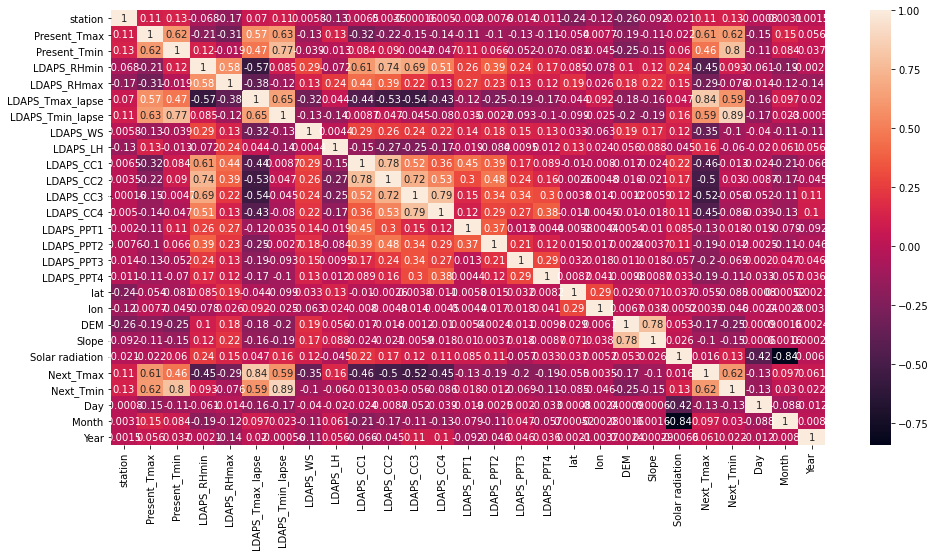

In [25]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(),annot=True)

The Tmax, Tmin are having significant positive correlation.( present, next, ldaps tmax and tmin)

Month is highly negatively correlated with solar radiation. And it is obvious that, during the rainy season, solar radiation will be less

DEM and slope are also significantly correlated

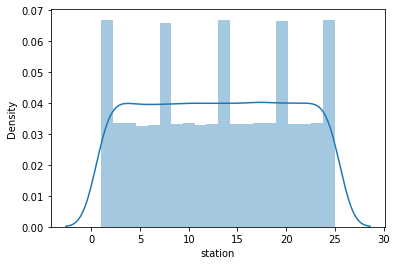

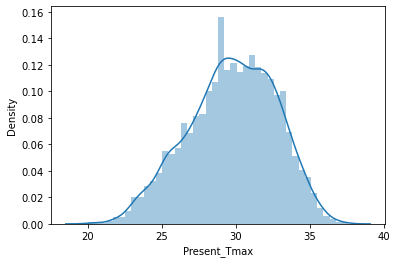

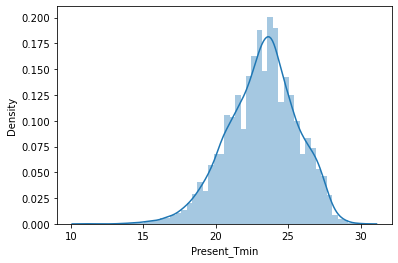

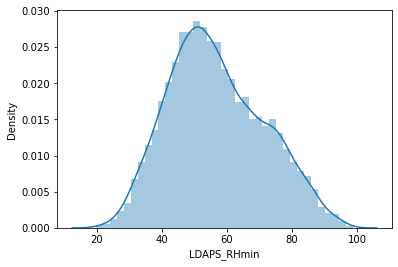

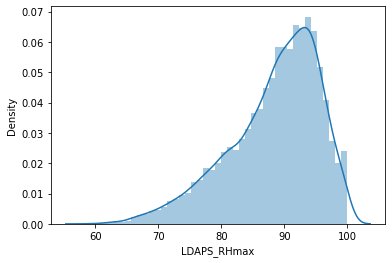

In [26]:
for i in df.columns[0:5]:
    plt.subplots()
    sns.distplot(df[i])

Rh max and min are a little bit skewed.

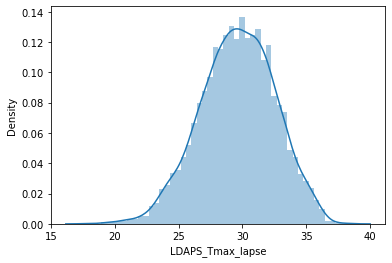

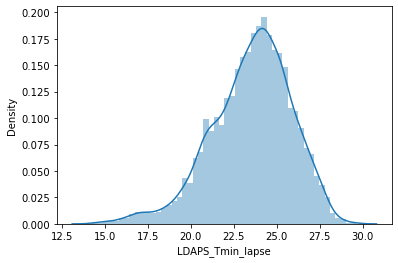

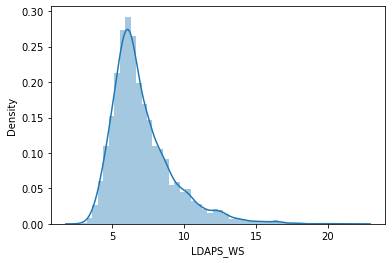

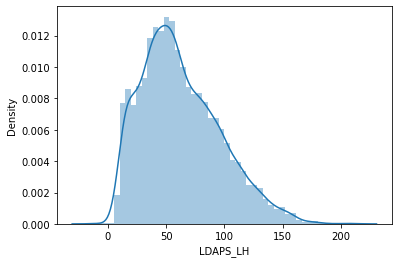

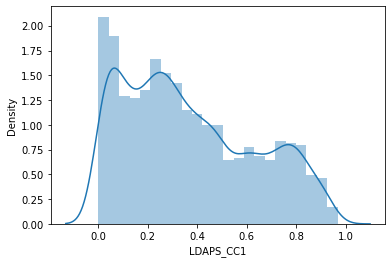

In [27]:
for i in df.columns[5:10]:
    plt.subplots()
    sns.distplot(df[i])

cc1 isnt near to normally distributed. Wind speed and latent heat flux are right skewed

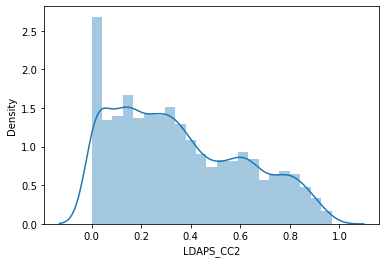

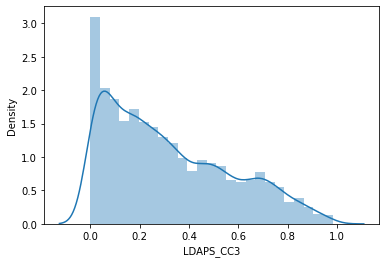

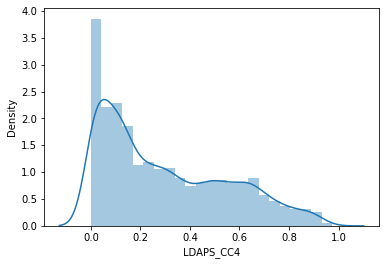

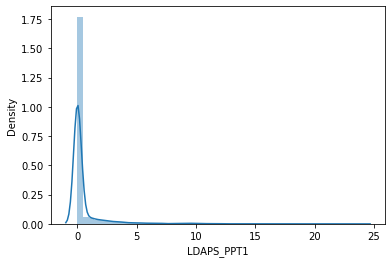

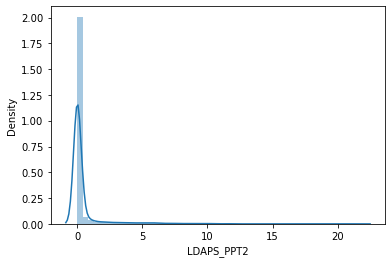

In [28]:
for i in df.columns[10:15]:
    plt.subplots()
    sns.distplot(df[i])

cloud cover all varibales (cc) are right skewed.

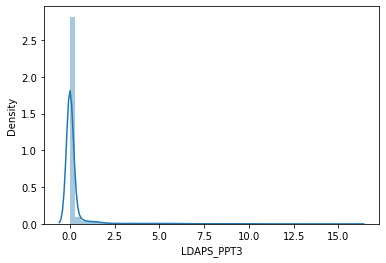

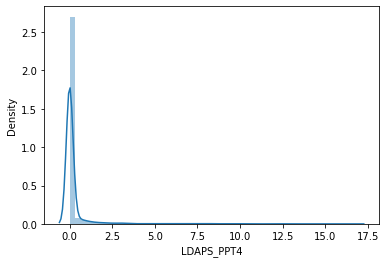

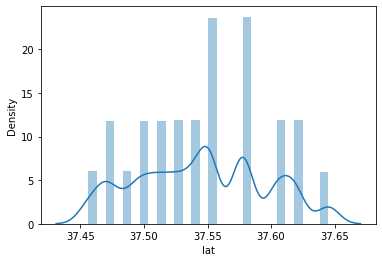

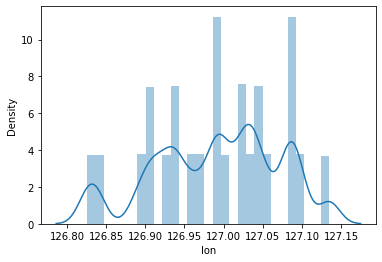

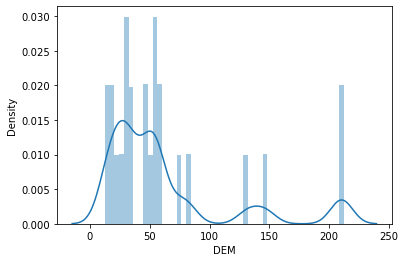

In [29]:
for i in df.columns[15:20]:
    plt.subplots()
    sns.distplot(df[i])

Precipitation are rightskewed, with most of the values near to zero. lat and long are not normally distributed, DEM is also not normally distributed

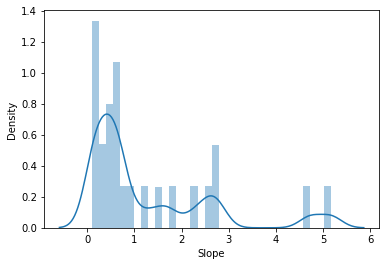

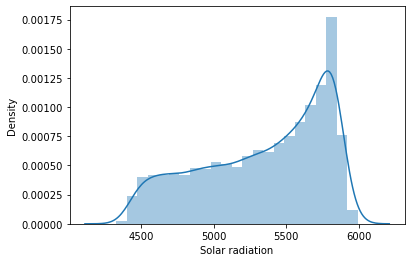

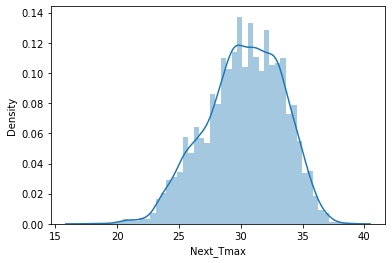

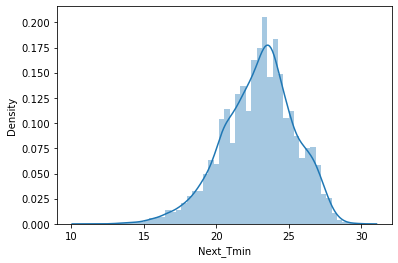

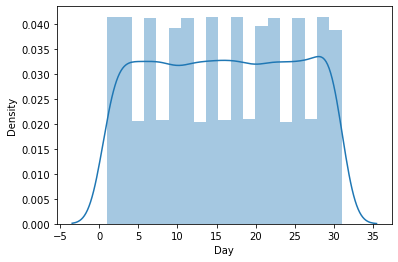

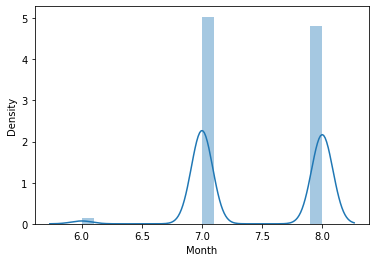

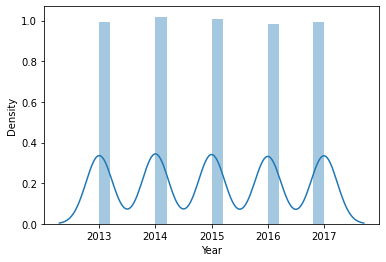

In [30]:
for i in df.columns[20:]:
    plt.subplots()
    sns.distplot(df[i])

solar radiation is left skewed

Lets check teh skewness and outliers

In [32]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                -0.010718
Month              -0.174856
Year                0.013575
dtype: float64

Rh max, WS, ppt1,2,3,4 , DEM, Slope have skewness more than 0.5

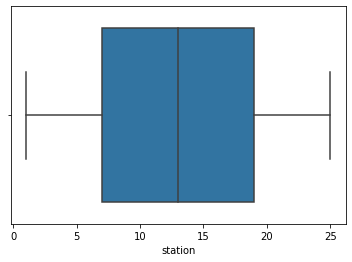

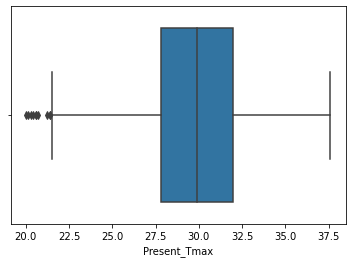

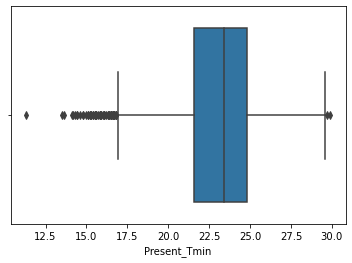

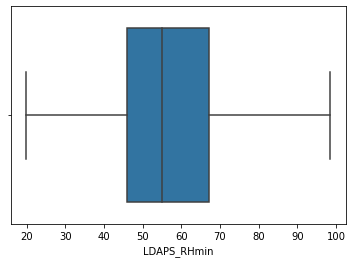

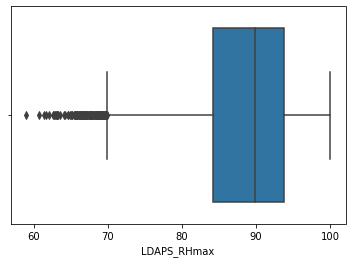

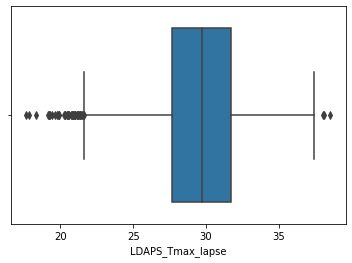

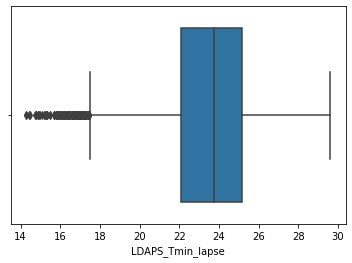

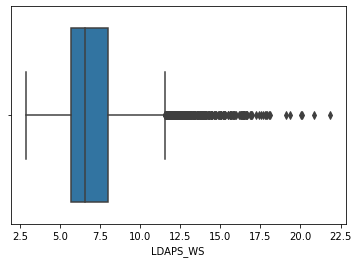

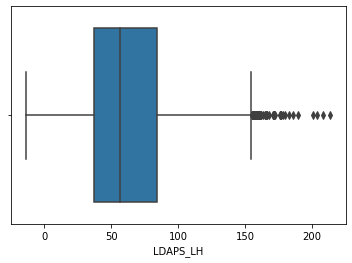

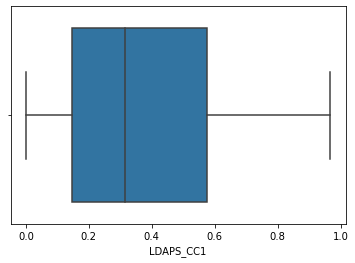

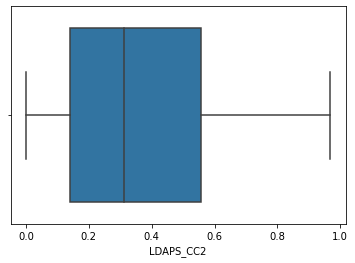

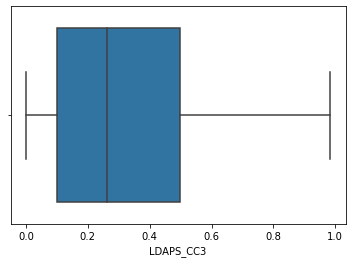

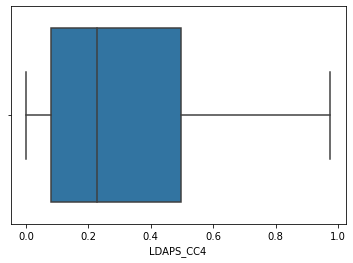

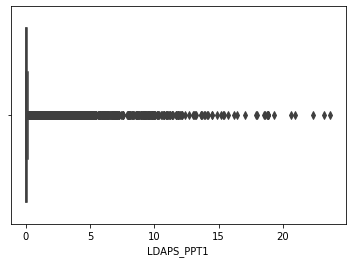

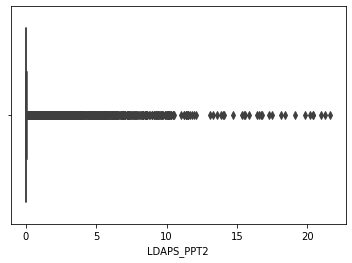

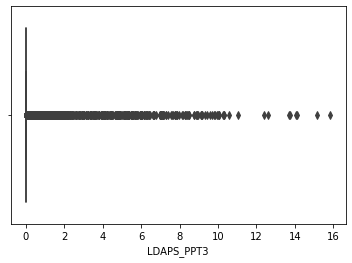

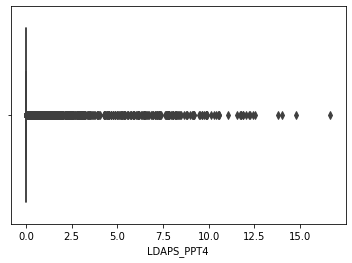

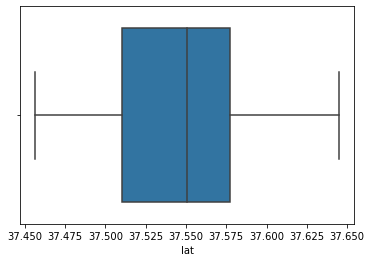

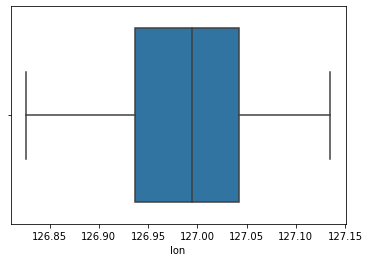

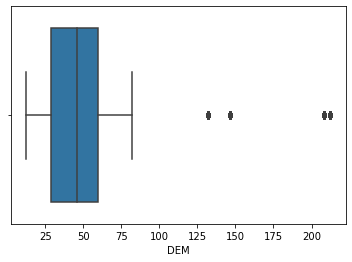

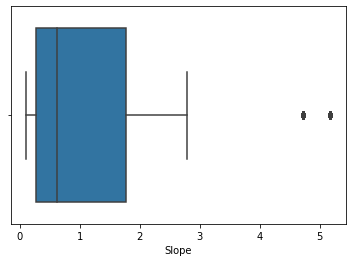

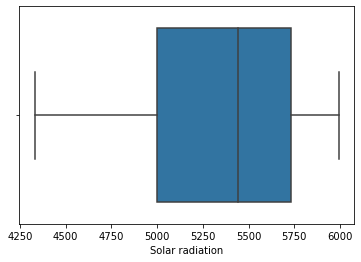

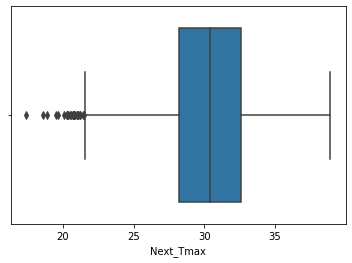

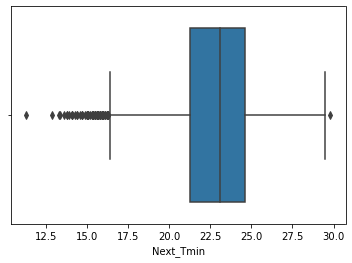

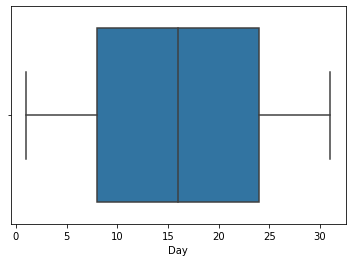

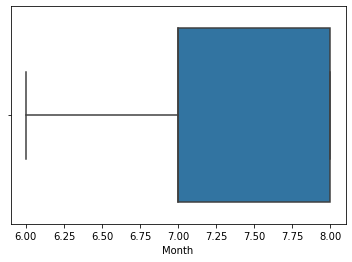

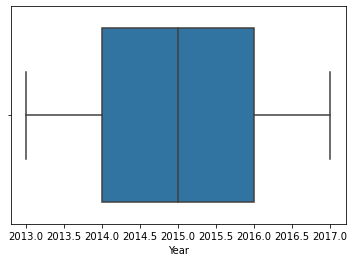

In [34]:
for i in df.columns:
    plt.subplots()
    sns.boxplot(df[i])

Present Tmax, Tmin ,Rhmax, Tmax, Tmin lapse, Ws, lH, ppt, DEM, slope have outliers

where ppt has most of the values near to 0, remaining other values  far from 0 are shown as outliers.

Dem and slope has few outliers

In [38]:
from scipy.stats import zscore

z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

df_new = df[(z<3).all(axis=1)]

In [39]:
df_new.shape

(6739, 27)

In [40]:
7752 - 6739

1013

In [41]:
1013/6739

0.15031903843300193

There will be 15% data loss if we remove outliers using zscore

15% data loss is huge and must ne avoided. Therefore, we will not remove the outliers, just we will handle skewness

In [42]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

In [43]:
col = ['LDAPS_RHmax','LDAPS_WS', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope']
# the coluns with unacceptable skewness

In [44]:
for i in col:
    print(i, np.log(df[i]).skew())

LDAPS_RHmax -1.0659445514181385
LDAPS_WS 0.5771197971647113
LDAPS_PPT1 nan
LDAPS_PPT2 nan
LDAPS_PPT3 nan
LDAPS_PPT4 nan
DEM 0.4097979513497477
Slope 0.0626788888083011


DEM, slope skewness have been reduced.

Since, ppt has most values near to 0 or 0, log transform wont work.

Rh max skewness is increased by log transformation

In [45]:
for i in col:
    print(i, np.sqrt(df[i]).skew())

LDAPS_RHmax -0.9526010292657139
LDAPS_WS 1.0358093557098158
LDAPS_PPT1 2.732742675483976
LDAPS_PPT2 3.1053869613703733
LDAPS_PPT3 3.644210243681506
LDAPS_PPT4 3.902692187388409
DEM 1.1516830704853924
Slope 0.8694830010104195


In [46]:
for i in col:
    print(i, np.cbrt(df[i]).skew())

LDAPS_RHmax -0.9896817224341397
LDAPS_WS 0.877760969666327
LDAPS_PPT1 1.9558684151755552
LDAPS_PPT2 2.2674865702242144
LDAPS_PPT3 2.57579513092942
LDAPS_PPT4 2.8377897954008957
DEM 0.9192645621517713
Slope 0.6128550904446982


Rh max skewness is not decreased by any transformation we used here. We will use the Rh max column as it is with 0.84 skewness

for ppt we will use cbrt transformation as it reduced the skewness by an extent

In [47]:
col1 = ['LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
col2 = ['LDAPS_WS','DEM','Slope']

for i in col1:
    df[i] = np.cbrt(df[i])
    
for i in col2:
    df[i] = np.log(df[i])
    

In [48]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.919696,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,5.358165,1.024248,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.739042,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,3.801369,-0.665337,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.814535,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,3.505762,-1.323883,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.731664,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,3.822448,0.930115,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.746589,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,3.556433,-0.682207,5859.552246,31.2,22.5,30,6,2013


Since, station is a categorical variable... lets add dummies for that.

In [49]:
dummies = pd.get_dummies(df['station'])

df = pd.concat([df,dummies],axis=1)

df.drop(columns=['station'],inplace=True)

In [50]:
df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.919696,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,5.358165,1.024248,5992.895996,29.1,21.2,30,6,2013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.739042,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,3.801369,-0.665337,5869.312500,30.5,22.5,30,6,2013,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.814535,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,3.505762,-1.323883,5863.555664,31.1,23.9,30,6,2013,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.731664,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,3.822448,0.930115,5856.964844,31.7,24.3,30,6,2013,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.746589,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,3.556433,-0.682207,5859.552246,31.2,22.5,30,6,2013,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
df.shape

(7588, 51)

The data is ready for scaling and modelling.

In [52]:
X = df.drop(columns =['Next_Tmax','Next_Tmin'])
Y = df[['Next_Tmax','Next_Tmin']]

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaledX = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [54]:
scaledX

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month,Year,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0
0,-0.353318,-0.748029,0.104660,0.382768,-0.525269,-0.215525,0.003282,0.206603,-0.513123,-0.587938,-0.623854,-0.660441,-0.559482,-0.509339,-0.483908,-0.430019,1.186076,-0.005302,2.044860,1.229366,1.510565,1.578778,-2.773359,-1.411767,4.903356,-0.20534,-0.204991,-0.204991,-0.201476,-0.20324,-0.20324,-0.202888,-0.203591,-0.20534,-0.20324,-0.203591,-0.204642,-0.203942,-0.203591,-0.204292,-0.20534,-0.20534,-0.203591,-0.204292,-0.204292,-0.203591,-0.20534,-0.203591,-0.20534
1,0.725138,-0.664721,-0.305052,0.311697,0.078334,0.223368,-0.649128,-0.313359,-0.545304,-0.402304,-0.632872,-0.673074,-0.559482,-0.509339,-0.483908,-0.430019,1.186076,0.512280,-0.032201,-0.279497,1.222997,1.578778,-2.773359,-1.411767,-0.203942,4.86997,-0.204991,-0.204991,-0.201476,-0.20324,-0.20324,-0.202888,-0.203591,-0.20534,-0.20324,-0.203591,-0.204642,-0.203942,-0.203591,-0.204292,-0.20534,-0.20534,-0.203591,-0.204292,-0.204292,-0.203591,-0.20534,-0.203591,-0.20534
2,0.624033,0.043400,-0.549344,-0.609425,0.160080,0.449896,-0.376493,-1.244497,-0.606944,-0.380211,-0.454151,-0.616249,-0.559482,-0.509339,-0.483908,-0.430019,0.650626,0.840503,-0.426596,-0.867602,1.209602,1.578778,-2.773359,-1.411767,-0.203942,-0.20534,4.878256,-0.204991,-0.201476,-0.20324,-0.20324,-0.202888,-0.203591,-0.20534,-0.20324,-0.203591,-0.204642,-0.203942,-0.203591,-0.204292,-0.20534,-0.20534,-0.203591,-0.204292,-0.204292,-0.203591,-0.20534,-0.203591,-0.20534
3,0.758840,0.085054,0.103573,1.128335,0.028710,-0.079238,-0.675772,0.096026,-0.580143,-0.502221,-0.626014,-0.647336,-0.559482,-0.509339,-0.483908,-0.430019,1.987268,0.386040,-0.004076,1.145301,1.194265,1.578778,-2.773359,-1.411767,-0.203942,-0.20534,-0.204991,4.878256,-0.201476,-0.20324,-0.20324,-0.202888,-0.203591,-0.20534,-0.20324,-0.203591,-0.204642,-0.203942,-0.203591,-0.204292,-0.20534,-0.20534,-0.203591,-0.204292,-0.204292,-0.203591,-0.20534,-0.203591,-0.20534
4,0.556630,-0.539758,-0.037665,0.249244,-0.171981,-0.010803,-0.621876,1.349989,-0.827872,-0.409191,-0.555021,-0.506152,-0.559482,-0.509339,-0.483908,-0.430019,0.117159,1.812547,-0.358991,-0.294562,1.200286,1.578778,-2.773359,-1.411767,-0.203942,-0.20534,-0.204991,-0.204991,4.963379,-0.20324,-0.20324,-0.202888,-0.203591,-0.20534,-0.20324,-0.203591,-0.204642,-0.203942,-0.203591,-0.204292,-0.20534,-0.20534,-0.203591,-0.204292,-0.204292,-0.203591,-0.20534,-0.203591,-0.20534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,-2.240616,-2.247578,-2.190405,-1.402898,-0.614083,-2.223667,-0.112765,-1.569844,-1.203497,-1.261546,-1.271117,-1.159890,-0.559482,-0.509339,-0.483908,-0.430019,0.117159,0.613271,-0.741823,-0.184035,-2.065599,1.578778,1.010217,1.423537,-0.203942,-0.20534,-0.204991,-0.204991,-0.201476,-0.20324,-0.20324,-0.202888,-0.203591,-0.20534,-0.20324,-0.203591,-0.204642,-0.203942,-0.203591,-0.204292,-0.20534,-0.20534,-0.203591,-0.204292,4.894949,-0.203591,-0.20534,-0.203591,-0.20534
7584,-2.442826,-2.414195,-1.820788,-0.648815,-0.990460,-2.432415,-0.601106,0.583486,-1.151793,-1.283455,-1.271114,-1.107407,-0.559482,-0.509339,-0.483908,-0.430019,-0.686016,1.193973,-0.981925,-1.485602,-2.098689,1.578778,1.010217,1.423537,-0.203942,-0.20534,-0.204991,-0.204991,-0.201476,-0.20324,-0.20324,-0.202888,-0.203591,-0.20534,-0.20324,-0.203591,-0.204642,-0.203942,-0.203591,-0.204292,-0.20534,-0.20534,-0.203591,-0.204292,-0.204292,4.911805,-0.20534,-0.203591,-0.20534
7585,-2.173212,-2.539157,-2.050081,-1.318376,-1.110333,-2.021883,-0.370207,0.283984,-1.290699,-1.064318,-1.271117,-1.1771

The data has been scaled.

In [56]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(scaledX,Y,test_size = 0.3, random_state = 11)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [59]:
model = [LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor(), KNeighborsRegressor(), Ridge(), Lasso()]

In [61]:
for mod in model:
    reg = mod
    
    reg.fit(xtrain,ytrain)
    pred = reg.predict(xtest)
    
    print(mod , 'r2' , r2_score(ytest,pred))
    print(mod , 'mse', mean_squared_error(ytest,pred))

LinearRegression() r2 0.8338756582103147
LinearRegression() mse 1.4051919254792131
RandomForestRegressor() r2 0.9050342799950046
RandomForestRegressor() mse 0.7736969536671048
DecisionTreeRegressor() r2 0.7794181903642196
DecisionTreeRegressor() mse 1.7714822134387367
KNeighborsRegressor() r2 0.6957812114619778
KNeighborsRegressor() mse 2.5136171277997392
Ridge() r2 0.8338833423794093
Ridge() mse 1.4051210527805311
Lasso() r2 0.6142425286801617
Lasso() mse 3.167309196660112


Linear regression, Random Forest Regressor and Ridge has r2_score of above 0.80. Lets check with cross_validation_score

In [62]:
cvs = [LinearRegression(), RandomForestRegressor(), Ridge()]

from sklearn.model_selection import cross_val_score

In [63]:
for mod in cvs:
    reg = mod
    
    reg.fit(xtrain,ytrain)
    pred = reg.predict(xtest)
    
    r2 = r2_score(ytest,pred)
    
    cross = cross_val_score(reg,scaledX,Y,cv=5,scoring='r2').mean()
    
    print(reg , (r2 - cross))

LinearRegression() 0.08480117785697194
RandomForestRegressor() 0.18636084001992437
Ridge() 0.08457977052006305


the least difference is for Ridge regression. Lets tune parameters for ridge

In [64]:
ridge = Ridge()

ridge.fit(xtrain,ytrain)
predr = ridge.predict(xtest)

print(r2_score(ytest,predr))

0.8338833423794093


In [65]:
from sklearn.model_selection import GridSearchCV

In [69]:
alpha = [0.001,0.01,0.1,1,10,100,1000]
solver = [ 'lsqr', 'sparse_cg', 'sag', 'saga']

parameters = dict(alpha=alpha, solver=solver)

In [70]:
gcv =GridSearchCV(ridge, param_grid = parameters, cv =5, scoring = 'r2')

In [71]:
gcv.fit(scaledX,Y)

gcv.best_params_

{'alpha': 100, 'solver': 'lsqr'}

In [73]:
gcv.best_score_

0.7581726035242337

After tuning the parameters, the final best score is 0.75 and best parameters are 'alpha': 100, 'solver': 'lsqr'

In [75]:
final_model = Ridge(alpha =100, solver = 'lsqr')

final_model.fit(xtrain,ytrain)

pred = final_model.predict(xtest)

print('r2', r2_score(ytest,pred))
print('rmse' , np.sqrt(mean_squared_error(ytest,pred)))

r2 0.8330592588388241
rmse 1.1882904521566258


The r2_score is 0.83 and root mean squared error is 1.18

# Conclusion

The data set has null values, after removing them the data loss is around 2.1% and is under acceptable range.

We have checked the skewness and outliers. We havent removed the outliers as the data loss was expected to be 15% and it would impact the models accuarcy for prediction which could be due to bias.

The skewness of the data has been handled using log and sqrt transformation.

We have trained 6 models out of which 3 models were having r2_score of more than 0.80

The models are linear regression, random forest regressor and ridge regression.

after validating with cross validation, the best model is ridge.

We tuned the hyper parameters for ridge regression using gridsearchcv and modelled with best parameters.

In [80]:
import pickle
filename = 'temperature.pkl'

pickle.dump(final_model,open(filename,'wb'))